<a href="https://colab.research.google.com/github/ioahKwon/storm-analysis-IOAH/blob/main/test_3D_DAOSTORM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

try:
  import storm_analysis
  
except ModuleNotFoundError:
  # Install SCONS and FFTW3 C library.
  !apt install scons
  !apt install libfftw3-dev

  # Get latest version of storm-analysis.
  !git clone https://github.com/KimLab-SNU/storm-analysis-kimlab.git # IOAH Version (last updated: 2021. 05. 12.)

  # Change to directory and compile.
  %cd storm-analysis-kimlab
  !scons

  # Install storm-analysis project.
  !{sys.executable} setup.py install
  
  # Manually add the installed storm-analysis project to the path.
  sys.path.append('/usr/local/lib/python3.6/dist-packages/storm_analysis-2.1-py3.6.egg')

  # Install dependencies.
  !{sys.executable} -m pip install tifffile

  # Return to parent directory.
  %cd ..
  
# These are for diagnostics.
!pwd
!ls

/content
calib.hdf5		  gdrive	     storm-analysis-kimlab  wobble.txt
calibration.xml		  measure2.xml	     val_measured_z.txt
calib.txt		  new_z_offsets.txt  val_measure.hdf5
cr_bound_3D_daoSTORM.txt  sample_data	     val_measure.txt


In [ ]:
try:
  import storm_analysis
  
except ModuleNotFoundError:
  print("Storm-analysis not found!")
  print("Restart Python kernel before continuing!")
  
else:
  for elt in sys.path:
    if "storm" in elt:
      print(elt) 

/usr/local/lib/python3.7/dist-packages/storm_analysis-2.2-py3.7.egg


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load sample z_offsets.txt file. In this example every frame is valid.
import numpy
import os
import tifffile as tiff

# Data path
data_path = "/content/gdrive/My Drive/data/20210326"

# Z offsets profile
######z_offsets = numpy.loadtxt("z_offsets.txt")
address_z_offsets = os.path.join(data_path, "z_offsets.txt")
z_offsets = numpy.loadtxt(address_z_offsets)

# Bead Locations
address_bead_locs = os.path.join(data_path, "bead_locs.txt")

# Tiff file
tif_file = os.path.join(data_path,"obSTORM_3DPSF_RedBead175nmDia_f200Cyl_z1_m1p8um_30nm_1p8um_1_combined.tif" )

In [ ]:
import math

newlist_z = z_offsets[:,1]
value = z_offsets[:,0]

z_list = []

# print(value)
print("z value\tcos(45)\tfinal_z")
print("="*40)

for i in newlist_z:
  val = math.cos(math.pi*(45/180))
  temp = i*round(val,5)
  z_list.append(round(temp,5))
  print(f"{i:.5f}\t{val:.5f}\t{temp:.5f}\t")

# Slicing
fin_z_list = z_list
print()
print(fin_z_list)

z value	cos(45)	final_z
-1.80000	0.70711	-1.27280	
-1.77000	0.70711	-1.25158	
-1.74000	0.70711	-1.23037	
-1.71000	0.70711	-1.20916	
-1.68000	0.70711	-1.18794	
-1.65000	0.70711	-1.16673	
-1.62000	0.70711	-1.14552	
-1.59000	0.70711	-1.12430	
-1.56000	0.70711	-1.10309	
-1.53000	0.70711	-1.08188	
-1.50000	0.70711	-1.06066	
-1.47000	0.70711	-1.03945	
-1.44000	0.70711	-1.01824	
-1.41000	0.70711	-0.99703	
-1.38000	0.70711	-0.97581	
-1.35000	0.70711	-0.95460	
-1.32000	0.70711	-0.93339	
-1.29000	0.70711	-0.91217	
-1.26000	0.70711	-0.89096	
-1.23000	0.70711	-0.86975	
-1.20000	0.70711	-0.84853	
-1.17000	0.70711	-0.82732	
-1.14000	0.70711	-0.80611	
-1.11000	0.70711	-0.78489	
-1.08000	0.70711	-0.76368	
-1.05000	0.70711	-0.74247	
-1.02000	0.70711	-0.72125	
-0.99000	0.70711	-0.70004	
-0.96000	0.70711	-0.67883	
-0.93000	0.70711	-0.65761	
-0.90000	0.70711	-0.63640	
-0.87000	0.70711	-0.61519	
-0.84000	0.70711	-0.59397	
-0.81000	0.70711	-0.57276	
-0.78000	0.70711	-0.55155	
-0.75000	0.70711	-0.53033	
-0.7

In [ ]:
import math

with open("new_z_offsets.txt", "w") as fp:
    for i in range(len(fin_z_list)):
        z = fin_z_list[i] # new value (*cos45)
        cnt = value[i] # original 0,1s
        fp.write("{0:.5f} {1:.5f}\n".format(cnt,z))
        
# First one
print("Start : ", fin_z_list[0])
print("Last : ", fin_z_list[-1])
print("="*40)
print("The subtraction results are...")

add = 0
temp = []

for i in range(len(fin_z_list)-1):
  sub = fin_z_list[i+1]-fin_z_list[i]
  temp.append(sub)
  if i%20 == 0:
    print(round(sub,5))
print("...")

for i in range(len(temp)):
  add = add+temp[i]

avg = add/len(temp)

print("The average difference : {0:.5f}".format(avg))

Start :  -1.2728
Last :  1.2728
The subtraction results are...
0.02122
0.02121
0.02122
0.02121
0.02121
0.02122
...
The average difference : 0.02121


Z Calibration

In [ ]:
import storm_analysis.sa_library.parameters as params

# Load the parameters
params = params.ParametersDAO()

# Analysis parameters

###########################
###  Essential Parameter ##
###########################
pixel_size = 144.5                                                # CCD pixel size (in nm)
max_z = 1.2728
min_z = -1.2728
z_step = 0.02121
sigma = 6
###########################


params.changeAttr("pixel_size", pixel_size)                       # CCD pixel size (in nm)
params.changeAttr("max_frame", -1)                                # The frame to stop analysis on, -1 = analyze to the end of the film.
params.changeAttr("start_frame", -1)                              # The frame to start analysis on, -1 = start at the beginning of the film
params.changeAttr("max_z", max_z)                                  # Maximum z value for z fitting, specified in um. ( z_range )
params.changeAttr("min_z", min_z)                                  # Minimum z value for z fitting, specified in um. ( z_range )
params.changeAttr('verbosity', 1)                                 # Frequency in frames at which to provide feedback. The default is every frame (verbosity = 1). This should be an integer >= 1.

# Tracking parameters
params.changeAttr("descriptor", 1)                                # Tracking parameter, frame descriptor string :
                                                                    # 0 - activation frame
                                                                    # 1 - non-specific frame
                                                                    # 2 - channel1 frame
                                                                    # 3 - channel2 frame
                                                                    # 4 - etc..

params.changeAttr("radius", 0)                                  # Radius for matching peaks from frame to frame. Localizations that are closer than
                                                                    # this value (in pixels) in adjacent frames (ignoring activation frames) are assumed
                                                                    # to come from the same emitter and are averaged together to create a (hopefully) 
                                                                    # more accurately localized emitter. If this is zero then no matching will be done
                                                                    # if it is 0, don't do tracking.
                                                                  # Maximum distance for an object to be in a track in pixels. 

# Drift Correction parameters
params.changeAttr("d_scale", 2)                                   # if your data is 256x256 pixels then the drift-correction will create 512x512 sub-STORM 
                                                                    # images (for d_scale = 2) and then attempt to correlate these images to each other to calculate the drift.
                                                                    # 2 is usually a good choice.
params.changeAttr("drift_correction", 0)                          # Do drift correction, 0 ='No'
params.changeAttr("z_correction", 0)                              # Do z drift correction, 0 = 'No'
params.changeAttr("frame_step", 20)                              # Number of frames in each (drift correction) sub-STORM image # 500


# Fitting parameters

params.changeAttr("background_sigma", 8)                        # Background filter sigma, this is the sigma of a 2D gaussian to convolve the data in order to estimate the background.

params.changeAttr("fftw_estimate", 0)                             # FFTW should estimate the best FFT plan instead of measuring which is best. This 
                                                                    # can help speed the analysis of short movies that are very large in XY. 0 = (default) 
                                                                    # FFTW will measure the best FFT plan. 1 = FFTW will estimate the best FFT plan.

params.changeAttr("fit_error_model", "MLE")                       # Specify which fitting error model to use. # Other Options : ALS(Anscombe Least Squares), LS(Least Squares), DWLS(Data Weighted Least Squares), FWLS(Fit Weighted Least Squares)
params.changeAttr("find_max_radius", 10,  node_type='int')         # To be a peak it must be the maximum value within this radius (in pixels).
                                                                    # Using a large find max radius -> reduces peak splitting.
params.changeAttr("iterations", 1)                               # Maximum number of iterations for new peak finding.
params.changeAttr("sigma", sigma)                                  # This is the estimated sigma of the PSF in pixels.
                                                                    # It is used in most of the analysis approaches as a measure of the peak to peak distance at which peak fits do not substantially effect each other.
                                                                    # In most of the analysis approaches, if two peaks are closer than
                                                                    #	this distance then the dimmer one will be discarded.
params.changeAttr('sigma_range', [0.1*sigma, 8.0*sigma])         # A two element array that specifies the minimum and maximum sigma values to allow when fitting for the peak width. 
                                                                    # If this is not specified the default is [0.5 * sigma, 5.0 * sigma].


params.changeAttr("threshold", 30 )                                # Threshold for a maximum to considered a peak.
                                                                    # This is the threshold for peak finding in units of signal to background. A
                                                                    # value of 3 for example corresponds to only selecting peaks with an (estimated)
                                                                    # signal to background ratio of 3.
                                                                    # You probably want a value of at least 5.

# Parameters that are common to 3D-DAOSTORM and sCMOS
params.changeAttr("cutoff", 5)                                    # Max allowed distance from the wx/wy versus Z curve, units unclear.
params.changeAttr("do_zfit", 0)                                   # Do z fitting (or not), only relevant for "3d" fitting (see "model" parameter).
params.changeAttr("foreground_sigma", 8)                        # Foreground filter sigma, this is the sigma of a 2D gaussian to convolve the data with
                                                                    # prior to peak identification. When your data has a low SNR this can help for peak
                                                                    # finding. For optimal sensitivity it should be the same as the expected sigma for your peaks.
                                                                    # If you set it to zero (or comment it out) then this will not be performed, which can make the analysis faster.
params.changeAttr("model", "3d")                                  # Options: 2dfixed, 2d, 3d, Z
                                                                    # 2dfixed - fixed sigma 2d gaussian fitting.
                                                                    # 2d - variable sigma 2d gaussian fitting.
                                                                    # 3d - x, y sigma are independently variable, z will be fit after peak fitting.
                                                                    # Z - x, y sigma depend on z, z is fit as part of peak fitting.
#params.changeAttr("roi_size", 28)                                 # This is the size of the fitting ROI in pixels. If it is not specified than the value
                                                                    # will be calculated based on the sigma parameter value and the fitting model type
params.changeAttr("z_value", 0)                                   # The starting z value for fitting. If this is not specified it defaults to 0.0.
params.changeAttr("z_step", z_step)                                # Step size of Z search in microns.
                                                                    # this is not specified it defaults to 1 nanometer. Units are microns.
# Saving Options
params.changeAttr('convert_to', ".txt")                           # Specify what, if any, formats to convert the output HDF5 file into upon completion of the analysis.
                                                                    # Options are .bin and .txt.
                                                                    # Use a comma separated list if you want both. i.e. ".bin, .txt".

# Parameters that are specific to 3D-DAOSTORM analysis
gain = 3.4/31.3/0.88
print("gain : ", 1/gain)
params.changeAttr("camera_gain", 1/gain)                            # 31.3/3.4 # Conversion factor to go from camera ADU to photo-electrons(ADU/photo-electron). Units are ADU/e-, so the camera ADU values will be divided by this number to convert to photo-electrons.
params.changeAttr("camera_offset", 4024)                          # This is what the camera reads with the shutter closed. Offset is in units of ADU.

# Save the changed parameters.
params.toXMLFile("calibration.xml", pretty = True)

gain :  8.101176470588236


In [ ]:
import os
import storm_analysis.daostorm_3d.mufit_analysis as mfit

if os.path.exists("calib.hdf5"):
    os.remove("calib.hdf5")
    
mfit.analyze(tif_file, "calib.hdf5", "calibration.xml")


version 2020.07.01

Peak finding
Frame : (Current Frame) (Added Peaks) (Total Peaks)
Frame: 0 4 4
Frame: 1 4 8
Frame: 2 4 12
Frame: 3 4 16
Frame: 4 4 20
Frame: 5 4 24
Frame: 6 4 28
Frame: 7 4 32
Frame: 8 4 36
Frame: 9 4 40
Frame: 10 4 44
Frame: 11 4 48
Frame: 12 4 52
Frame: 13 4 56
Frame: 14 4 60
Frame: 15 4 64
Frame: 16 4 68
Frame: 17 4 72
Frame: 18 4 76
Frame: 19 4 80
Frame: 20 4 84
Frame: 21 4 88
Frame: 22 4 92
Frame: 23 4 96
Frame: 24 4 100
Frame: 25 4 104
Frame: 26 4 108
Frame: 27 4 112
Frame: 28 4 116
Frame: 29 4 120
Frame: 30 4 124
Frame: 31 4 128
Frame: 32 4 132
Frame: 33 4 136
Frame: 34 4 140
Frame: 35 4 144
Frame: 36 4 148
Frame: 37 4 152
Frame: 38 4 156
Frame: 39 4 160
Frame: 40 4 164
Frame: 41 4 168
Frame: 42 4 172
Frame: 43 4 176
Frame: 44 4 180
Frame: 45 4 184
Frame: 46 4 188
Frame: 47 4 192
Frame: 48 4 196
Frame: 49 4 200
Frame: 50 4 204
Frame: 51 4 208
Frame: 52 4 212
Frame: 53 4 216
Frame: 54 4 220
Frame: 55 4 224
Frame: 56 4 228
Frame: 57 4 232
Frame: 58 4 236
Frame:

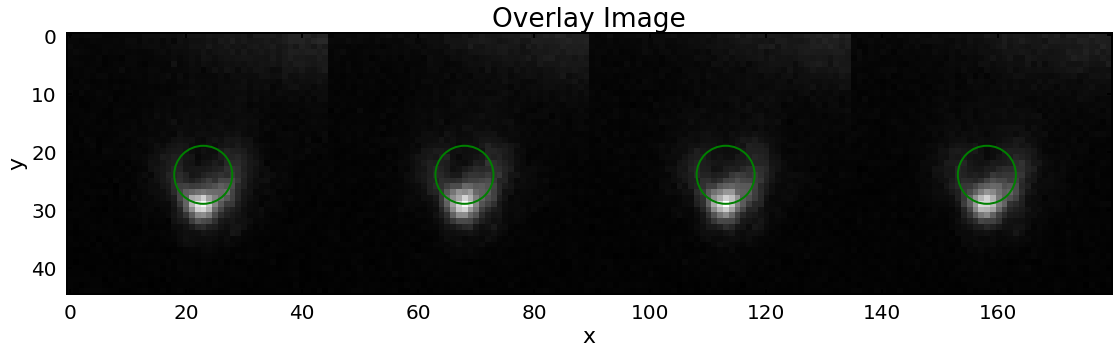

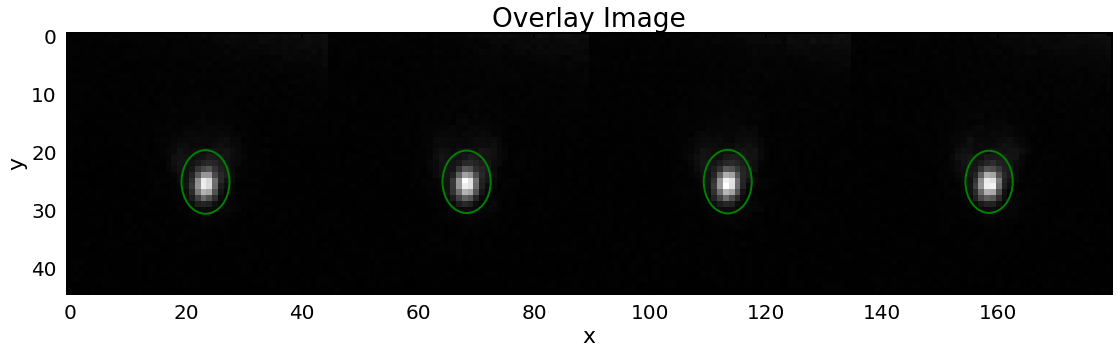

In [ ]:
import storm_analysis.jupyter_examples.overlay_image as overlay_image

overlay_image.overlayImageBeads(tif_file, address_bead_locs, 120, sx = 16, sy = 16) # Original Image
overlay_image.overlayImage(tif_file, "calib.hdf5", 80, sx = 16, sy = 16) # Gaussian Fitting

Tracks not found, using localizations.
.


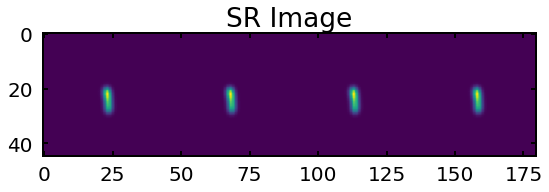

In [ ]:
import matplotlib
import matplotlib.pyplot as pyplot

import storm_analysis.sa_utilities.hdf5_to_image as h5_image

sr_im = h5_image.render2DImage("calib.hdf5", scale = 1, sigma = 1)
fig = pyplot.figure(figsize = (8, 8))
ax = fig.add_subplot(2,1,1)
ax.imshow(sr_im)
ax.set_title("SR Image")
pyplot.show()

In [ ]:
def hdf5ToWobbleText(hdf5_name, text_name, x_pix_to_nm, y_pix_to_nm):
    import storm_analysis.sa_library.sa_h5py as saH5Py
    smlc_file_fp = open(text_name, "w")
    smlc_file_fp.write("index, frame, xnano, ynano, znano, intensity\n")

    print("Saving Localizations")
    count = 0
    with saH5Py.SAH5Py(hdf5_name) as h5:
        for fnum, locs in h5.localizationsIterator(fields = ["x", "y", "sum"]):
                 
            for i in range(locs["x"].size):
                count += 1
                xp = locs["x"][i]*x_pix_to_nm
                yp = locs["y"][i]*y_pix_to_nm
                zp = 0.0
                intensity = locs["sum"][i]
                    
                smlc_file_fp.write("{0:d}, {1:d}, {2:.3f}, {3:.3f}, {4:.3f}, {5:.3f}\n".format(count, fnum, xp, yp, zp, intensity))

    print()
    print("Saved", count, "localizations.")
    smlc_file_fp.close()

In [ ]:
hdf5ToWobbleText("calib.hdf5", "wobble.txt", 144.5, 144.5) # x_pix_to_nm, y_pix_to_nm

Saving Localizations

Saved 484 localizations.


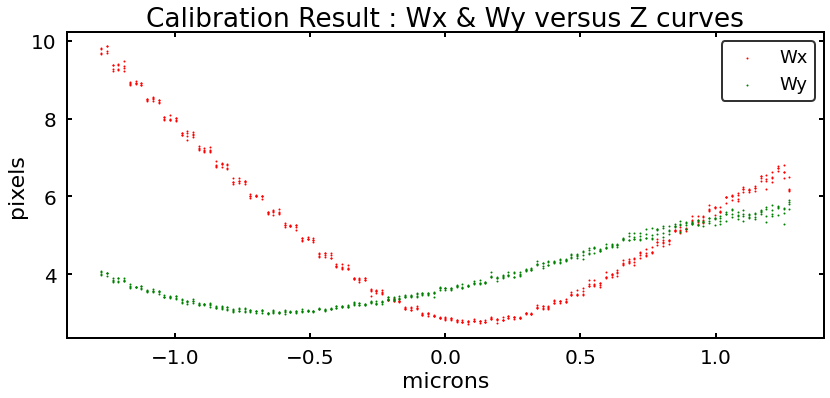

In [ ]:
import matplotlib
import matplotlib.pyplot as pyplot

# Change default figure size.
matplotlib.rcParams['figure.figsize'] = (12,6)

import storm_analysis.daostorm_3d.z_calibration as z_cal

[wx, wy, z, pixel_size] = z_cal.loadWxWyZData("calib.hdf5", "new_z_offsets.txt")

p1 = pyplot.scatter(z, wx, color = 'r', label = 'Wx', s=1) # Curves1 (z vs wx)
p2 = pyplot.scatter(z, wy, color = 'g', label = 'Wy', s=1) # Curves2 (z vs wy)
legend = pyplot.legend(handles = [p1, p2], loc=1)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('black')
pyplot.xlabel("microns")
pyplot.ylabel("pixels")
pyplot.title("Calibration Result : Wx & Wy versus Z curves")
pyplot.show()

Fitting (round 1).
[2.723389696520745, 0.18040285697596276, -0.44127141146584475]
Fitting (round 2).
[2.7723957866589894, 0.12041966817879271, -0.4614648615895654, 0.043792172583088824, 0.021137082991977488, 0.008172949948332321, -0.003689976532115203]
Removing outliers.
Fitting (round 3).


/usr/local/lib/python3.7/dist-packages/storm_analysis-2.2-py3.7.egg/storm_analysis/daostorm_3d/z_calibration.py:396: RuntimeWarning: invalid value encountered in sqrt
  return wo*numpy.sqrt(1.0 + numpy.power(X,2) + A * numpy.power(X,3) + B * numpy.power(X,4) + C * numpy.power(X,5) + D * numpy.power(X,6))


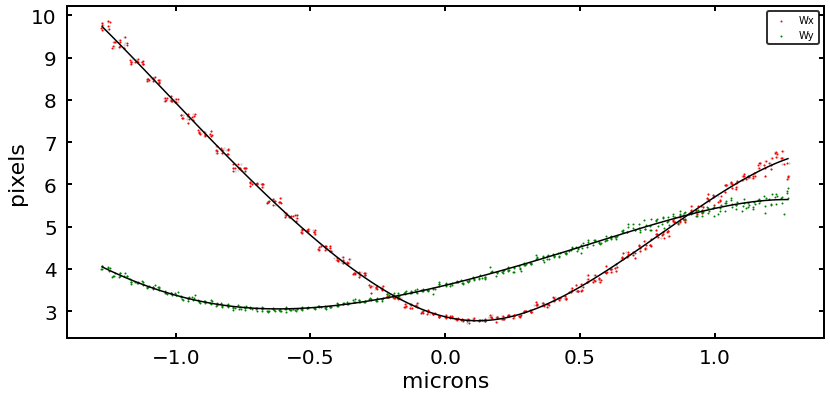

<?xml version="1.0" encoding="ISO-8859-1"?>
<xml>
   <wx_wo>400.611</wx_wo>
   <wx_c>120.420</wx_c>
   <wx_d>-461.465</wx_d>
   <wxA>0.044</wxA>
   <wxB>0.021</wxB>
   <wxC>0.008</wxC>
   <wxD>-0.004</wxD>
   <wy_wo>441.168</wy_wo>
   <wy_c>-620.255</wy_c>
   <wy_d>-882.370</wy_d>
   <wyA>0.397</wyA>
   <wyB>0.182</wyB>
   <wyC>-0.005</wyC>
   <wyD>-0.024</wyD>
</xml>



In [ ]:
fit_order = 4
outliers = 6.0 # Sigma to be considered an outlier.

p_start = [3.2,0.19,1.2]

# Fit curves
print("Fitting (round 1).")
[wx_params, wy_params] = z_cal.fitDefocusingCurves(wx, wy, z, n_additional = 0, z_params = p_start)
print(wx_params)
p_start = wx_params[:3]

# Fit curves.
print("Fitting (round 2).")
[wx_params, wy_params] = z_cal.fitDefocusingCurves(wx, wy, z, n_additional = fit_order, z_params = p_start)
print(wx_params)
p_start = wx_params[:3]

# Remove outliers.
  # This removes all wx, wy that are more than threshold sigma from the fit curve.
print("Removing outliers.")
[t_wx, t_wy, t_z] = z_cal.removeOutliers(wx, wy, z, wx_params, wy_params, outliers)

# Redo fit.
print("Fitting (round 3).")
[wx_params, wy_params] = z_cal.fitDefocusingCurves(t_wx, t_wy, t_z, n_additional = fit_order, z_params = p_start)

# Plot fit.
z_cal.plotFit(wx, wy, z, t_wx, t_wy, t_z, wx_params, wy_params, z_min = min_z, z_max = max_z, z_step = z_step)

# This prints the parameter with the scale expected by 3D-DAOSTORM in the analysis XML file.
z_cal.prettyPrint(wx_params, wy_params, pixel_size = pixel_size)

In [ ]:
import storm_analysis.sa_library.parameters as params
new_params = params.ParametersDAO().initFromFile("calibration.xml")

# Update calibration parameters.
z_cal.setWxWyParams(new_params, wx_params, wy_params, pixel_size)

# Do z fitting.
new_params.changeAttr("do_zfit", 1)

# Set maximum allowed distance in wx, wy space that a point can be from the 
# calibration curve.
# Max allowed distance from the wx/wy versus Z curve, units unclear.

new_params.changeAttr("cutoff", 2)

# Use a higher threshold as the Gaussian PSF is not a good match for our PSF model, so
# we'll get spurious peak splitting if it is too low.
new_params.changeAttr("threshold", 30)

# Don't do tracking or drift correction as this movie is the same as the calibration
# movie, every frame has a different z value.
new_params.changeAttr("radius", 0.0)
new_params.changeAttr("drift_correction", 0)
new_params.changeAttr("camera_offset", 4024) #4024
new_params.prettyPrint()
# Save the changed parameters.
new_params.toXMLFile("measure2.xml")

aoi_radius (int) - None
background_sigma (float) - 8.0
camera_gain (float) - 8.101176470588236
camera_offset (float) - 4024
convert_to (string) - .txt
cutoff (float) - 2
d_scale (int) - 2
descriptor (string) - 1
do_zfit (int) - 1
drift_correction (int) - 0
fftw_estimate (int) - 0
find_max_radius (int) - 10
fit_error_model (string) - MLE
foreground_sigma (float) - 8.0
frame_step (int) - 20
iterations (int) - 1
max_frame (int) - -1
max_gap (int) - None
max_z (float) - 1.2728
min_z (float) - -1.2728
model (string) - 3d
no_fitting (int) - None
parameters_file (parameters_filename) - calibration.xml
peak_locations (filename) - None
pixel_size (float) - 144.5
radius (float) - 0.0
roi_size (int) - None
sigma (float) - 6.0
sigma_range (float-array) - [0.6000000000000001, 48.0]
start_frame (int) - -1
static_background_estimate (int) - None
threshold (float) - 30
verbosity (int) - 1
wxA (float) - 0.04379210552260736
wxB (float) - 0.021137106164847347
wxC (float) - 0.008172961640651477
wxD (float

In [ ]:
val_file = tif_file

if os.path.exists("val_measure.hdf5"):
    os.remove("val_measure.hdf5")
    
mfit.analyze(val_file, "val_measure.hdf5", "measure2.xml")


version 2020.07.01

Peak finding
Frame : (Current Frame) (Added Peaks) (Total Peaks)
Frame: 0 4 4
Frame: 1 4 8
Frame: 2 4 12
Frame: 3 4 16
Frame: 4 4 20
Frame: 5 4 24
Frame: 6 4 28
Frame: 7 4 32
Frame: 8 4 36
Frame: 9 4 40
Frame: 10 4 44
Frame: 11 4 48
Frame: 12 4 52
Frame: 13 4 56
Frame: 14 4 60
Frame: 15 4 64
Frame: 16 4 68
Frame: 17 4 72
Frame: 18 4 76
Frame: 19 4 80
Frame: 20 4 84
Frame: 21 4 88
Frame: 22 4 92
Frame: 23 4 96
Frame: 24 4 100
Frame: 25 4 104
Frame: 26 4 108
Frame: 27 4 112
Frame: 28 4 116
Frame: 29 4 120
Frame: 30 4 124
Frame: 31 4 128
Frame: 32 4 132
Frame: 33 4 136
Frame: 34 4 140
Frame: 35 4 144
Frame: 36 4 148
Frame: 37 4 152
Frame: 38 4 156
Frame: 39 4 160
Frame: 40 4 164
Frame: 41 4 168
Frame: 42 4 172
Frame: 43 4 176
Frame: 44 4 180
Frame: 45 4 184
Frame: 46 4 188
Frame: 47 4 192
Frame: 48 4 196
Frame: 49 4 200
Frame: 50 4 204
Frame: 51 4 208
Frame: 52 4 212
Frame: 53 4 216
Frame: 54 4 220
Frame: 55 4 224
Frame: 56 4 228
Frame: 57 4 232
Frame: 58 4 236
Frame:

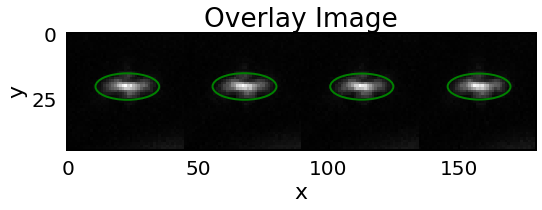

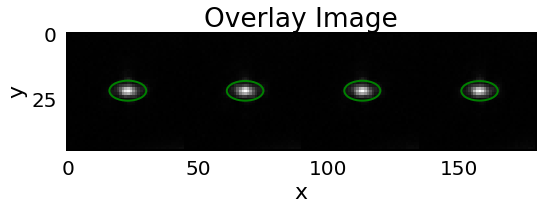

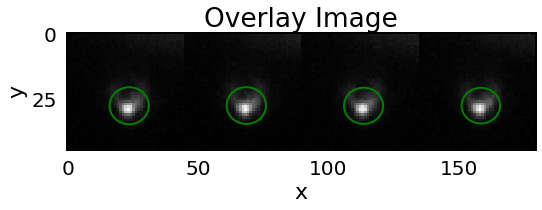

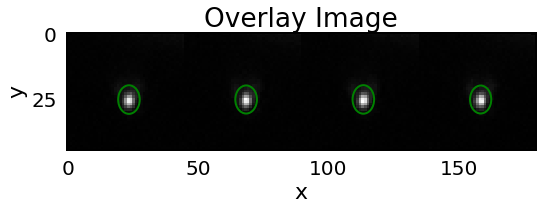

In [ ]:
overlay_image.overlayImage(val_file, "val_measure.hdf5", 0)
overlay_image.overlayImage(val_file, "val_measure.hdf5", 30)
overlay_image.overlayImage(val_file, "val_measure.hdf5", 110)
overlay_image.overlayImage(val_file, "val_measure.hdf5", 80)

Total Localization :  484
Total length wx_good :  484
Total length wy_good :  484




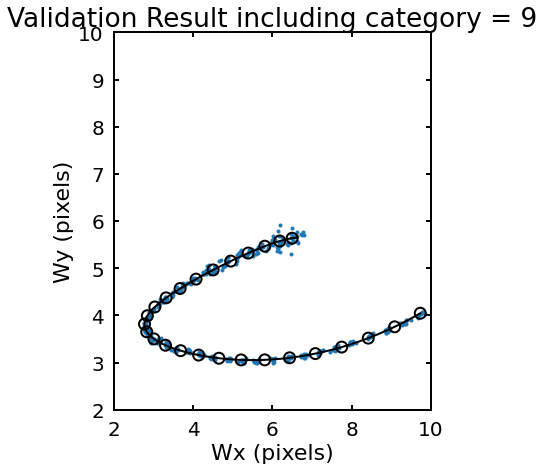

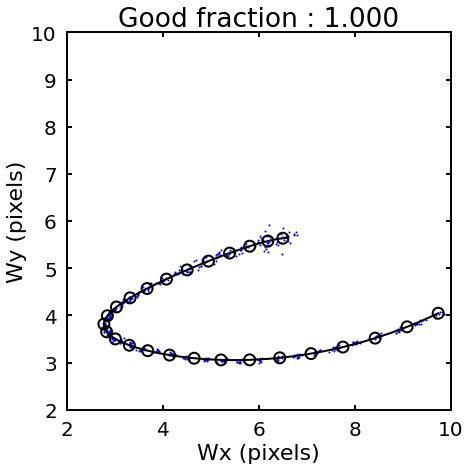

In [ ]:
import storm_analysis.sa_library.sa_h5py as saH5Py
import numpy

locs = saH5Py.loadLocalizations("val_measure.hdf5")

mask = (locs["category"] != 9) # Mark out of z range localizations and tracks as category 9.
wx_good = 2.0*locs["xsigma"][mask]
wy_good = 2.0*locs["ysigma"][mask]

mask = (locs["category"] == 9) # Mark out of z range localizations and tracks as category 9.
wx_bad = 2.0*locs["xsigma"][mask]
wy_bad = 2.0*locs["ysigma"][mask]

print("Total Localization : ", len(locs["z"]))
print("Total length wx_good : ", len(wx_good))
print("Total length wy_good : ", len(wy_good))
print("\n")

# Load Z calibration parameters.
m_params = params.ParametersDAO().initFromFile("measure2.xml")

[wx_params, wy_params] = m_params.getWidthParams()
[min_z, max_z] = m_params.getZRange()

# Z range is in microns, want nanometers.
min_z = min_z * 1.0e+3
max_z = max_z * 1.0e+3

# Calculate fit z curve at high resolution

fz_wx_1 = z_cal.zcalib4(wx_params, numpy.arange(min_z, max_z + 1, 10))/pixel_size
fz_wy_1 = z_cal.zcalib4(wy_params, numpy.arange(min_z, max_z + 1, 10))/pixel_size

# Calculate fit z curve at 100nm resolution.

fz_wx_2 = z_cal.zcalib4(wx_params, numpy.arange(min_z, max_z + 1, 100))/pixel_size
fz_wy_2 = z_cal.zcalib4(wy_params, numpy.arange(min_z, max_z + 1, 100))/pixel_size

# Make figure.
fig = pyplot.figure(figsize = (7,7))
pyplot.scatter(wx_good, wy_good, marker = ".")
pyplot.scatter(fz_wx_2, fz_wy_2, marker = "o", s = 120, edgecolor = "black", facecolor = 'none', linewidths = 2)
pyplot.plot(fz_wx_1, fz_wy_1, color = "black", linewidth = 2)
pyplot.xlim(2,10)
pyplot.ylim(2,10)
pyplot.xlabel("Wx (pixels)")
pyplot.ylabel("Wy (pixels)")
pyplot.title("Validation Result including category = 9".format(wx_good.size/mask.size))
pyplot.show()

# classified by categories ( Blue -> category != 9, Red -> category = 9)
pyplot.figure(figsize = (7,7))
pyplot.scatter(wx_good, wy_good, s = 1, color = "blue")
pyplot.scatter(wx_bad, wy_bad, s = 1, color = "red")
pyplot.scatter(fz_wx_2, fz_wy_2, marker = "o", s = 120, edgecolor = "black", facecolor = 'none', linewidths = 2)
pyplot.plot(fz_wx_1, fz_wy_1, color = "black", linewidth = 2)
pyplot.xlim(2,10)
pyplot.ylim(2,10)
pyplot.title("Good fraction : {0:.3f}".format(wx_good.size/mask.size))
pyplot.xlabel("Wx (pixels)")
pyplot.ylabel("Wy (pixels)")
pyplot.show()

Tracks not found, using localizations.
.


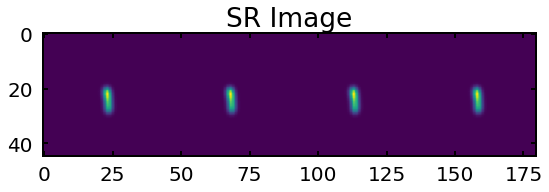

In [ ]:
import matplotlib
import matplotlib.pyplot as pyplot
import storm_analysis.sa_utilities.hdf5_to_image as h5_image

sr_im = h5_image.render2DImage("val_measure.hdf5", scale = 1, sigma = 1) 

fig = pyplot.figure(figsize = (8, 8))
ax = fig.add_subplot(1,1,1)
ax.imshow(sr_im)
ax.set_title("SR Image")

pyplot.show()

In [ ]:
measured_z = numpy.array([])
with saH5Py.SAH5Reader("val_measure.hdf5") as h5:
    for fnum, locs in h5.localizationsIterator(fields = ["category", "z"]):
        z = locs["z"]
        if z.size != 0:
          measured_z = numpy.concatenate((measured_z, z))
  
valid = numpy.ones(measured_z.size)
numpy.savetxt('val_measured_z.txt', numpy.transpose(numpy.vstack((valid, measured_z))), fmt='%.3f')
print("Saving succeeded.")

Saving succeeded.


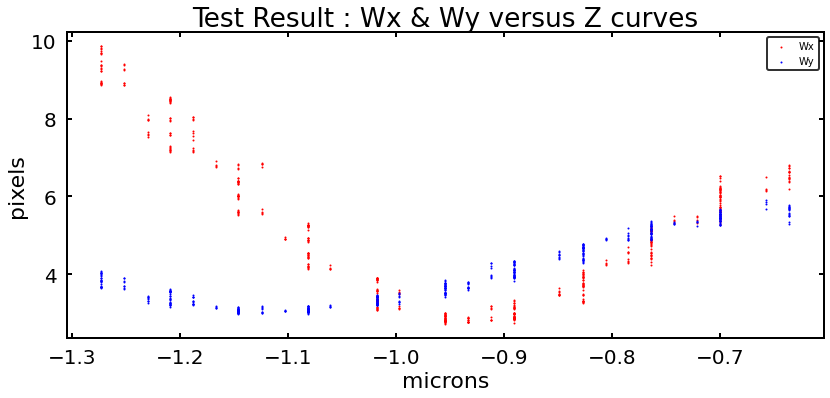

In [ ]:
[wx, wy, z, pixel_size] = z_cal.loadWxWyZData("val_measure.hdf5", "val_measured_z.txt")

p1 = pyplot.scatter(z, wx, color = 'r', label = 'Wx', s=1) # Curves1 (z vs wx)
p2 = pyplot.scatter(z, wy, color = 'b', label = 'Wy', s=1) # Curves2 (z vs wy)
legend = pyplot.legend(handles = [p1, p2], loc=1)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('black')
pyplot.xlabel("microns")
pyplot.ylabel("pixels")
pyplot.title("Test Result : Wx & Wy versus Z curves")
pyplot.show()

In [ ]:
import math
import numpy
import scipy
import scipy.integrate

def cramerRaoBound2(intensity, background, pixel_size, psf_size, is_emccd = False):
    """
    intensity - photo-electrons.
    background - photo-electrons.
    pixel_size - camera pixel size in nanometers.
    psf_size - PSF sigma in nanometers.
    """
    
    px_sqr = pixel_size * pixel_size

    #
    # This is the average value returned by daostorm analysis, 2d
    # fit for the highest intensity bead data.
    #
    psf_sqr = psf_size * psf_size

    sa_sqr = psf_sqr + px_sqr/12.0

    def integral_fn(t, N, bg_sqr):
        ln_t = math.log(t)
        t2 = N * px_sqr * t / (2.0 * math.pi * sa_sqr * bg_sqr)
        return ln_t/(1.0 + t2)

    integ = scipy.integrate.quad(lambda x: integral_fn(x, intensity, background), 1.0e-9, 1.0)[0]

    if is_emccd:
        return math.sqrt(2.0 * (sa_sqr/intensity) * 1.0/(1.0 + integ))
    else:
        return math.sqrt((sa_sqr/intensity) * 1.0/(1.0 + integ))



In [ ]:
h5_name = "/content/val_measure.hdf5"
data = saH5Py.loadLocalizations(h5_name)

bg = data["background"]
height = data["height"]
zs = data["z"]
sx = data["xsigma"]
sy = data["ysigma"]

bg_list = []
height_list = []
zs_list = []
sx_list = []
sy_list = []

for i in range(len(bg)):
  bg_list.append(bg[i])

for j in range(len(height)):
  height_list.append(height[j])

for k in range(len(zs)):
  zs_list.append(zs[k])

for p in range(len(sx)):
  sx_list.append(sx[p])

for q in range(len(sy)):
  sy_list.append(sy[q])

print("bg list : " , bg_list)
print("height list : " , height_list)
print("z list : " , zs_list)
print("sigma x list : " , sx_list)
print("sigma y list : " , sy_list)

bg list :  [44.76879897197577, 47.80759370002989, 45.858905698087284, 50.673399598832326, 45.125452853985635, 47.53786130770522, 46.10368278365406, 51.00054240671108, 45.12450027699077, 47.918863760130535, 46.19975665570005, 51.41271337168867, 44.92764056643183, 48.13732262570958, 46.19644873741284, 51.420894707562226, 45.46786794115533, 48.23044972185741, 46.27892002384389, 51.42789369529954, 44.224920494331194, 46.693244755352204, 44.91575208081059, 49.226345137201726, 44.74452715189563, 46.47557577855722, 45.15015848255862, 49.550214389237986, 44.348646493205365, 46.6558865174503, 44.85989257994532, 49.36810755799068, 44.08742661108044, 46.67468357997531, 44.675593181542474, 49.563360973789784, 44.18238401367294, 46.20893437383993, 45.091314490566106, 48.79208901717343, 44.000460132958025, 46.4406804340885, 44.8071593731458, 49.6439204404543, 44.093895557617515, 45.27064174568836, 46.22855150993939, 48.9979854828585, 45.37035594657339, 48.87370158124093, 43.89345639343928, 46.670020

In [ ]:
import storm_analysis.sa_utilities.mortensen as mortensen
import math
import numpy

pixel_size = 144.5
with open("cr_bound_3D_daoSTORM.txt", "w") as fp:
  for i in range(len(bg_list)):
    background = bg_list[i]
    width_x = sx_list[i]*2*pixel_size
    width_y = sy_list[i]*2*pixel_size
    print("width_x[{}]: {:.3f}".format(i,width_x))
    print("width_y[{}]: {:.3f}".format(i,width_y))
    photons = (height_list[i]*math.pi/2*width_x*width_y)/(pixel_size**2)

    crlb_x = cramerRaoBound2(photons, background, pixel_size = 144.5,
                                    psf_size = sx_list[i]*144.5,
                                    is_emccd = True)
    crlb_y = cramerRaoBound2(photons, background, pixel_size = 144.5,
                                    psf_size = sy_list[i]*144.5,
                                    is_emccd = True)

    crx = (crlb_x)
    cry = crlb_y

    if i != 10000:
      print("    z : {0:.3f}, cr_x : {1:.3f}, cr_y : {2:.3f}, photons : {3:.1f} \n".format(zs_list[i], crx, cry, photons))

    fp.write("{0:.3f} {1:.9f} {2:.9f} {3:9f} \n".format(zs_list[i], crx, cry, photons))

width_x[0]: 1413.752
width_y[0]: 587.529
    z : -1.273, cr_x : 4.566, cr_y : 1.625, photons : 79081.8 

width_x[1]: 1417.698
width_y[1]: 588.497
    z : -1.273, cr_x : 4.594, cr_y : 1.624, photons : 79947.7 

width_x[2]: 1400.702
width_y[2]: 578.747
    z : -1.273, cr_x : 4.654, cr_y : 1.639, photons : 75796.8 

width_x[3]: 1394.498
width_y[3]: 577.068
    z : -1.252, cr_x : 4.640, cr_y : 1.626, photons : 77240.2 

width_x[4]: 1424.823
width_y[4]: 582.142
    z : -1.273, cr_x : 4.626, cr_y : 1.612, photons : 78867.0 

width_x[5]: 1424.334
width_y[5]: 582.623
    z : -1.273, cr_x : 4.598, cr_y : 1.600, photons : 80492.4 

width_x[6]: 1408.359
width_y[6]: 583.828
    z : -1.273, cr_x : 4.630, cr_y : 1.637, photons : 77325.1 

width_x[7]: 1398.589
width_y[7]: 570.393
    z : -1.252, cr_x : 4.637, cr_y : 1.599, photons : 77880.6 

width_x[8]: 1353.371
width_y[8]: 562.739
    z : -1.209, cr_x : 4.253, cr_y : 1.529, photons : 81161.9 

width_x[9]: 1355.138
width_y[9]: 552.898
    z : -1.209

z_ranges are :  1.3


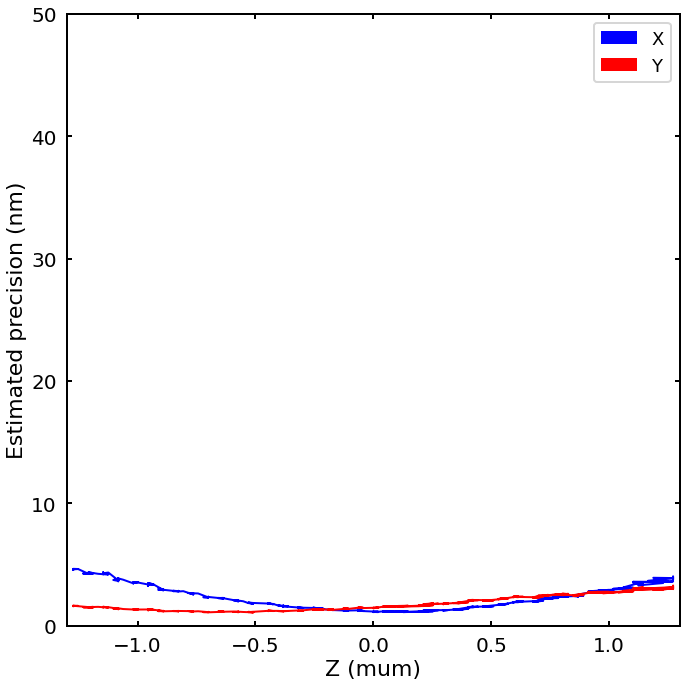

In [ ]:
import matplotlib
import matplotlib.pyplot as pyplot
import numpy
import os
import sys

# Cramer-Rao bounds
cr_bounds = numpy.loadtxt("cr_bound_3D_daoSTORM.txt")

# Configure plots
matplotlib.rcParams["figure.figsize"] = (10, 10)
matplotlib.rc('axes', linewidth=2)
matplotlib.rc('legend', fontsize=18, handlelength=2)

matplotlib.rcParams['figure.autolayout'] = True
matplotlib.rcParams['font.size'] = 22
matplotlib.rcParams['savefig.directory'] = os.chdir(os.getcwd())
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['ytick.major.width'] = 2

### XY plot.

fig = pyplot.figure()

# Plot.
pyplot.plot(cr_bounds[:,0], cr_bounds[:,1], color = "blue", linewidth = 2) # crx
pyplot.plot(cr_bounds[:,0], cr_bounds[:,2], color = "red", linewidth = 2) # cry

#pyplot.plot(cr_bounds[:,0], cr_bounds[:,3], color = "green", linewidth = 2) # crz


# Legend
p1 = pyplot.Rectangle((0, 0), 0.1, 0.1, fc="blue")
p2 = pyplot.Rectangle((0, 0), 0.1, 0.1, fc="red")
#p3 = pyplot.Rectangle((0, 0), 0.1, 0.1, fc="green")

# Adds the legend into plot
legend = pyplot.legend((p1, p2), ('X', 'Y'), loc=1)
legend.get_frame().set_linewidth(2)

# Etc.
z_range = 1.3
print("z_ranges are : ", z_range)
pyplot.xlim((-z_range, z_range))
pyplot.ylim((0.0, 50))
pyplot.xlabel("Z (mum)")
pyplot.ylabel("Estimated precision (nm)")

pyplot.show()


In [ ]:
## 원본 2021.09.15.

import storm_analysis.sa_utilities.mortensen as mortensen
import math
import numpy
print("gain : ", 1/gain)

pixel_size = 144.5
with open("cr_bound_3D_daoSTORM.txt", "w") as fp:
  for i in range(len(bg_list)):
    background = bg_list[i]
    width_x = sx_list[i]*2  #교수님
    width_y = sy_list[i]*2 #교수님
    print("width_x : ", width_x)
    print("width_y : ", width_y)
    #photons = (height_list[i]*2*math.pi)/(width_x*width_y)*((1/gain)**2)
    photons = (height_list[i]*math.pi/2)*(width_x*width_y)/((pixel_size)**2)


    crlb_x = mortensen.cramerRaoBound(photons, background, pixel_size = 144.5,
                                    psf_size = 2*sx_list[i]*144.5,
                                    is_emccd = True)
    crlb_y = mortensen.cramerRaoBound(photons, background, pixel_size = 144.5,
                                    psf_size = 2*sy_list[i]*144.5,
                                    is_emccd = True)
    

    crx = math.sqrt(crlb_x) 
    cry = math.sqrt(crlb_y)
#    crz = math.sqrt(crlb[3])

    if i != 10000:
      print("z : ", zs_list[i], crx, cry, photons)

    fp.write("{0:.3f} {1:.9f} {2:.9f} {3:9f} \n".format(zs_list[i], crx, cry, photons))

gain :  8.101176470588236
width_x :  19.571445347115265
width_y :  8.133531321077335
z :  -1.2728 114.83195114645858 48.16304471189147 12.48842003970072
width_x :  19.626065455839747
width_y :  8.146931229477346
z :  -1.2728 116.93764830021445 48.986114844872716 12.513718295443871
width_x :  19.39077859616443
width_y :  8.011953459191002
z :  -1.2728 114.10530334287769 47.59561309856157 12.566619577690522
width_x :  19.304898801525376
width_y :  7.988707681039509
z :  -1.25159 114.53379051550829 47.8469242278156 12.995414624481107
width_x :  19.724708419645204
width_y :  8.058953898548895
z :  -1.2728 115.95151694038641 47.823130128687765 12.489683452637136
width_x :  19.71793924291582
width_y :  8.065609442700561
z :  -1.2728 116.29457217751137 48.01823658728847 12.734805327101897
width_x :  19.49678615419289
width_y :  8.082294325535834
z :  -1.2728 115.36403872585433 48.270099019843094 12.461206608845032
width_x :  19.3615328181978
width_y :  7.896296551257624
z :  -1.25159 113.5866

/usr/local/lib/python3.7/dist-packages/storm_analysis-2.2-py3.7.egg/storm_analysis/sa_utilities/mortensen.py:37: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integ = scipy.integrate.quad(lambda x: integral_fn(x, intensity, background), 1.0e-9, 1.0)[0]


46.39100102378574 20.90011305623185 42.3812673161852
width_x :  13.587359507753318
width_y :  6.367163396174651
z :  -0.8273899999999992 41.9556220043565 20.0149184220177 44.607838869280194
width_x :  13.613309189275672
width_y :  6.25966135885982
z :  -0.8273899999999992 41.94458108922017 19.647342008663312 46.11926345396908
width_x :  13.806678657467241
width_y :  6.344412452989573
z :  -0.8485999999999992 43.17723974739099 20.20116696504206 43.78113280823844
width_x :  13.504299474750578
width_y :  6.279365059252729
z :  -0.8273899999999992 42.07570741351244 19.922225791147426 45.736407808802475
width_x :  13.723839838725869
width_y :  6.379753327445291
z :  -0.8485999999999992 42.646223518550585 20.1813608055678 43.80335130846785
width_x :  13.656302211593458
width_y :  6.247602080062151
z :  -0.8273899999999992 42.21461489847255 19.67534273932633 45.793947328456774
width_x :  13.651426647911697
width_y :  6.215968924765179
z :  -0.8273899999999992 41.92829178519348 19.457300966477